# Introduction

### Objective: We want to compare song popularity to the different columns (features) and see how well those features will correlate with the song popularity to see which features are predictable.

## Imports

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

### Reading Data

In [30]:
data = pd.read_csv("data_big.csv")
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


#### Visual Representation of the data

In [26]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [27]:
categorical = ['key','year', 'artists', 'release_date']
numerical = ['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'liveness', 'loudness','release_date', 'speechiness', 'tempo', 'valence']

In [28]:
data['key'] = data['key'].astype('category')
data['explicit'] = data['explicit'].astype('category')
data['year'] = data['year'].astype('category')
data['artists'] = data['artists'].astype('category')
data['name'] = data['name'].astype('category')

In [29]:
data.sort_values(by=['popularity'], ascending=False).head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019
87946,0.32100,['Drake'],0.834,247059,0.454,1,127QTOFJsJQp5LbJbu3A1y,0.000006,1,0.1140,-9.750,0,Toosie Slide,95,2020-04-03,0.2010,81.618,0.837,2020
87840,0.10400,['Roddy Ricch'],0.896,196653,0.586,1,0nbXyq5TXYPCO7pr3N8S4I,0.000000,10,0.7900,-6.687,0,The Box,95,2019-12-06,0.0559,116.971,0.642,2019
87844,0.30500,"['BENEE', 'Gus Dapperton']",0.863,223480,0.631,1,4nK5YrxbMGZstTLbvj6Gxw,0.000030,7,0.1230,-4.689,1,Supalonely,95,2019-11-15,0.0534,128.977,0.817,2019
87943,0.74900,['StaySolidRocky'],0.728,147800,0.431,0,5RqR4ZCCKJDcBLIn4sih9l,0.000000,6,0.0996,-9.966,0,Party Girl,94,2020-04-21,0.0622,130.022,0.629,2020
87951,0.02640,['6ix9ine'],0.611,132303,0.688,1,4NhDYoQTYCdWHTvlbGVgwo,0.000000,1,0.2510,-5.688,1,GOOBA,94,2020-05-08,0.3410,178.462,0.393,2020


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156608 entries, 0 to 169907
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   acousticness      156608 non-null  float64 
 1   artists           156608 non-null  category
 2   danceability      156608 non-null  float64 
 3   duration_ms       156608 non-null  int64   
 4   energy            156608 non-null  float64 
 5   explicit          156608 non-null  category
 6   id                156608 non-null  object  
 7   instrumentalness  156608 non-null  float64 
 8   key               156608 non-null  category
 9   liveness          156608 non-null  float64 
 10  loudness          156608 non-null  float64 
 11  mode              156608 non-null  int64   
 12  name              156608 non-null  category
 13  popularity        156608 non-null  int64   
 14  release_date      156608 non-null  object  
 15  speechiness       156608 non-null  float64 
 16  te

In [9]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence
count,156608.000000,156608.000000,1.566080e+05,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000,156608.000000
mean,0.495783,0.537458,2.310463e+05,0.487088,0.163163,0.207698,-11.393035,0.707505,31.156588,0.096316,116.896800,0.531012
std,0.376842,0.175659,1.221553e+05,0.267400,0.309991,0.177673,5.665935,0.454910,21.513933,0.154385,30.790044,0.262406
min,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095700,0.416000,1.706400e+05,0.262000,0.000000,0.098700,-14.514000,0.000000,12.000000,0.035000,93.363750,0.321000
50%,0.499000,0.547000,2.080405e+05,0.478000,0.000214,0.136000,-10.499000,1.000000,33.000000,0.045300,114.765500,0.543000
75%,0.890000,0.667000,2.625330e+05,0.708000,0.092125,0.264000,-7.132750,1.000000,48.000000,0.076800,135.750250,0.748000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,3.855000,1.000000,97.000000,0.969000,244.091000,1.000000


In [10]:
#Vaughns 
categorical_variables = ['explicit', 'key', 'mode']
continuous_variables = ['acousticness', 'energy', 'danceability','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

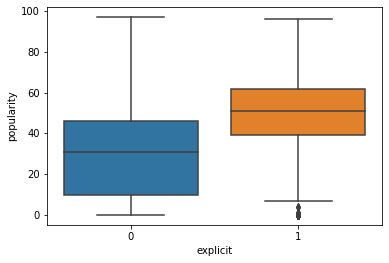

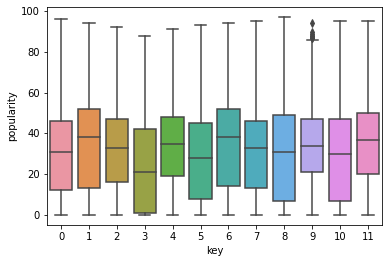

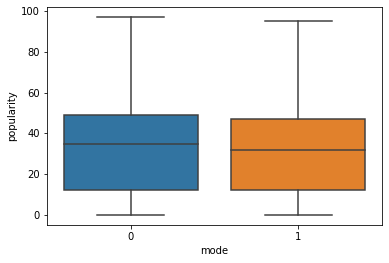

In [11]:
for var in categorical_variables:
    sns.boxplot(x=data[var], y=data['popularity'])
    plt.show()

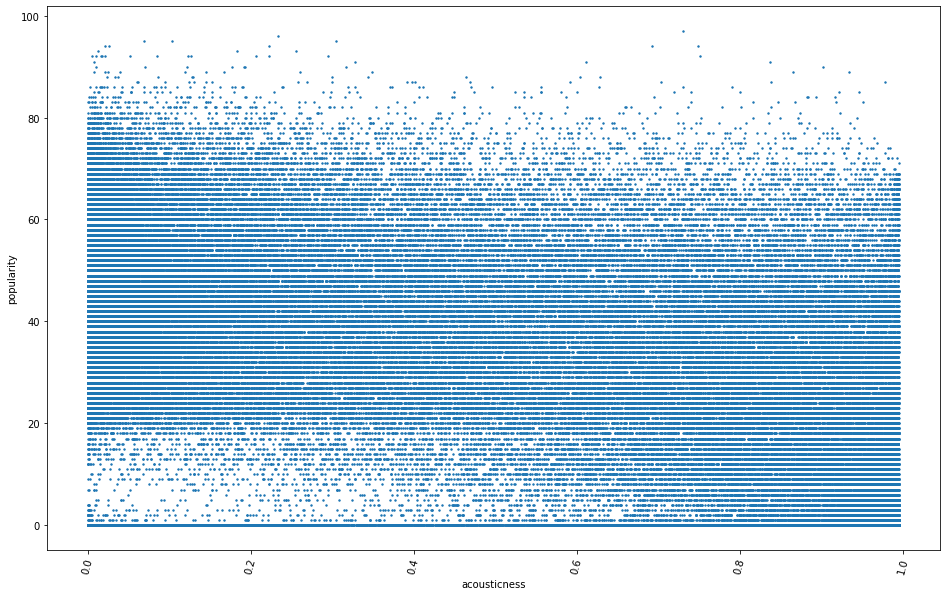

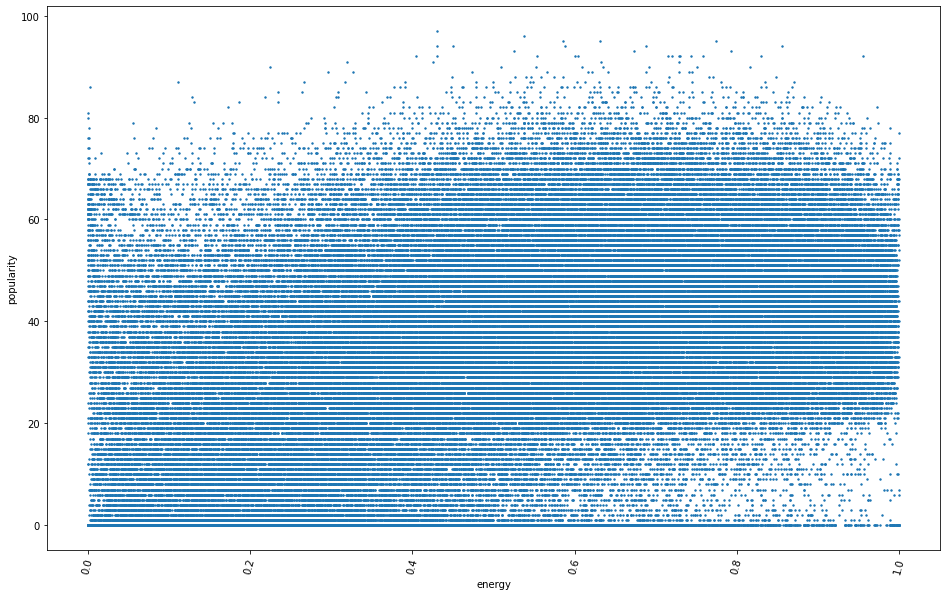

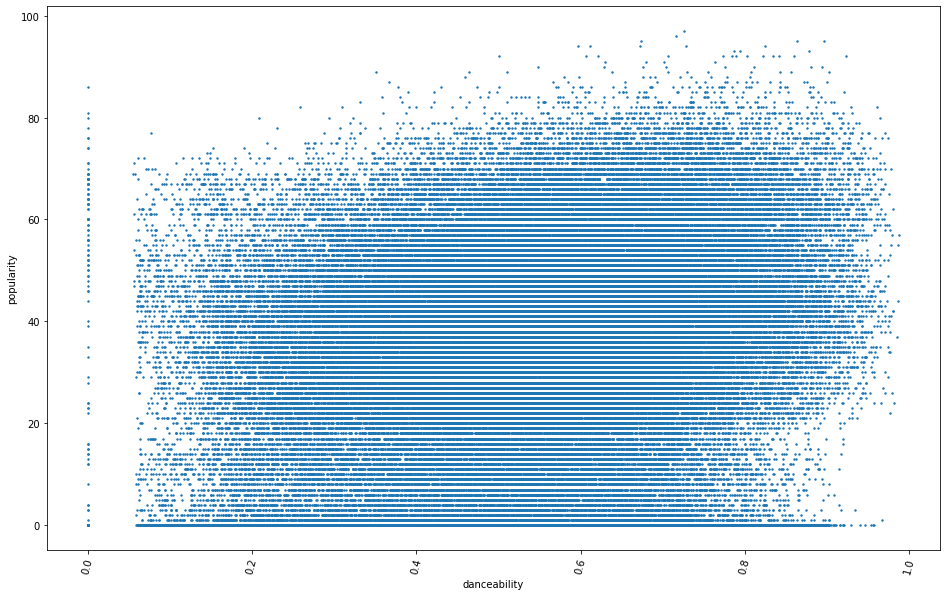

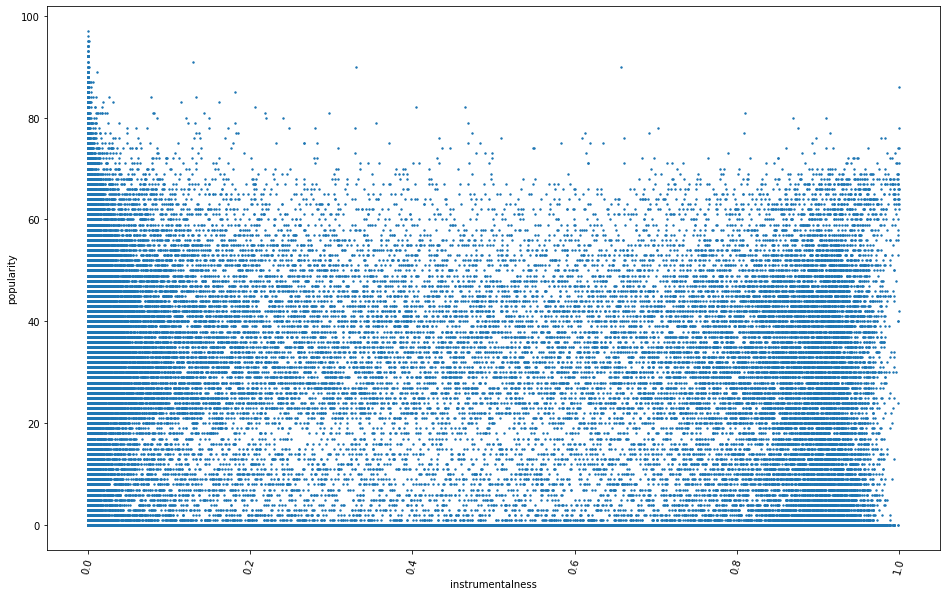

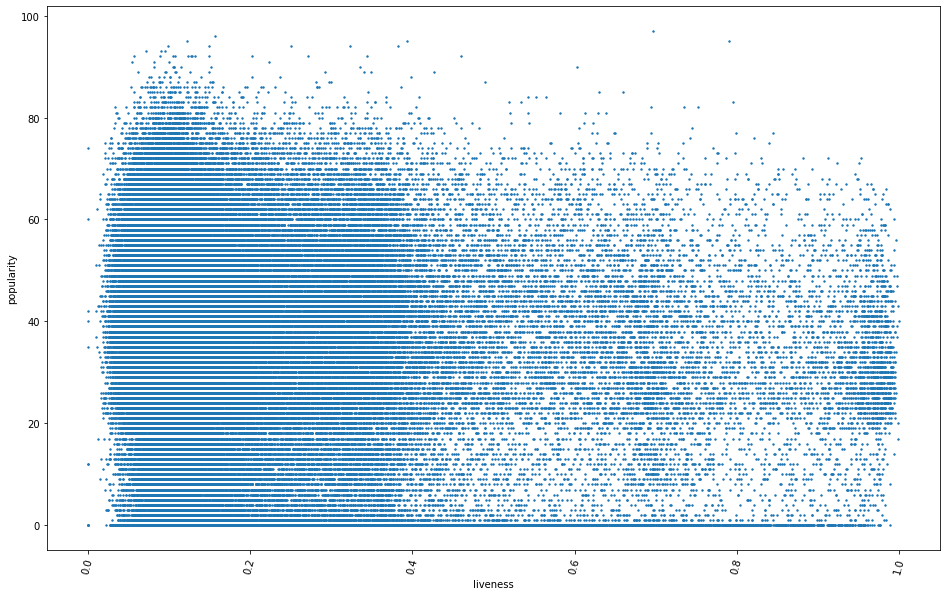

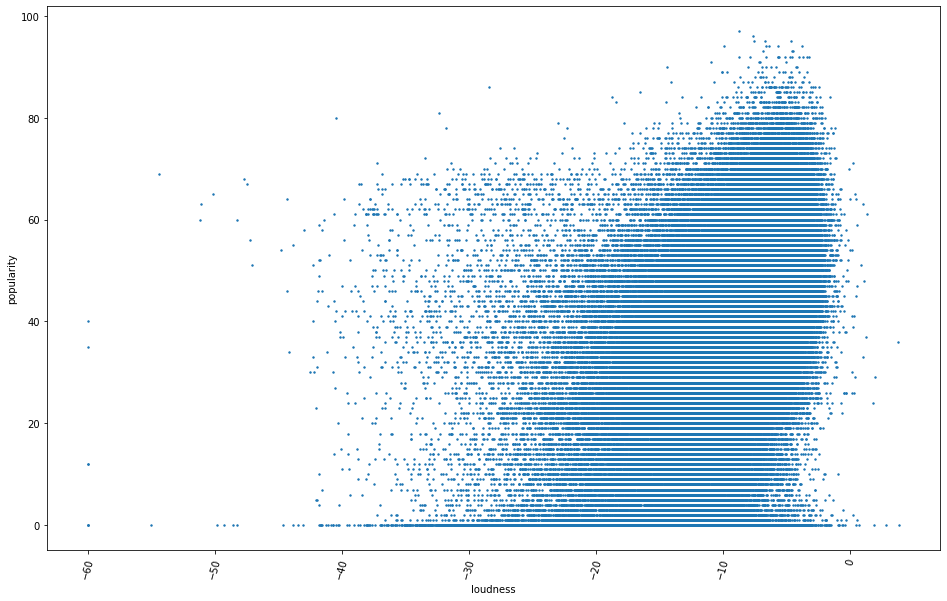

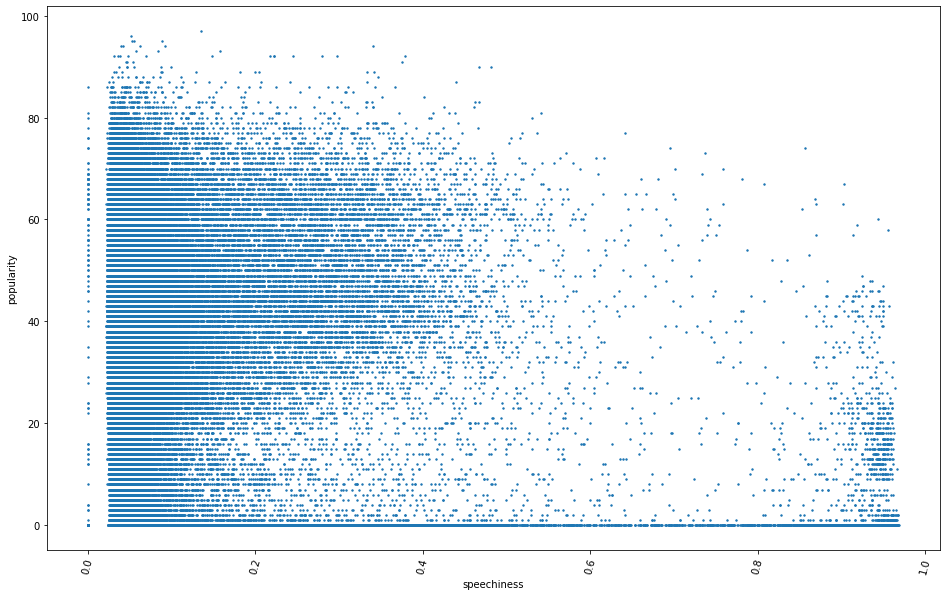

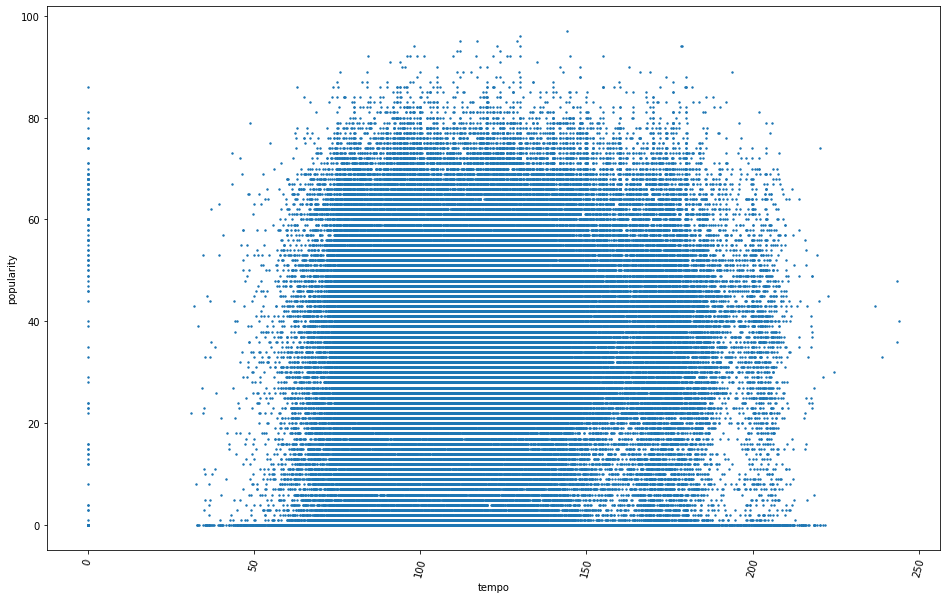

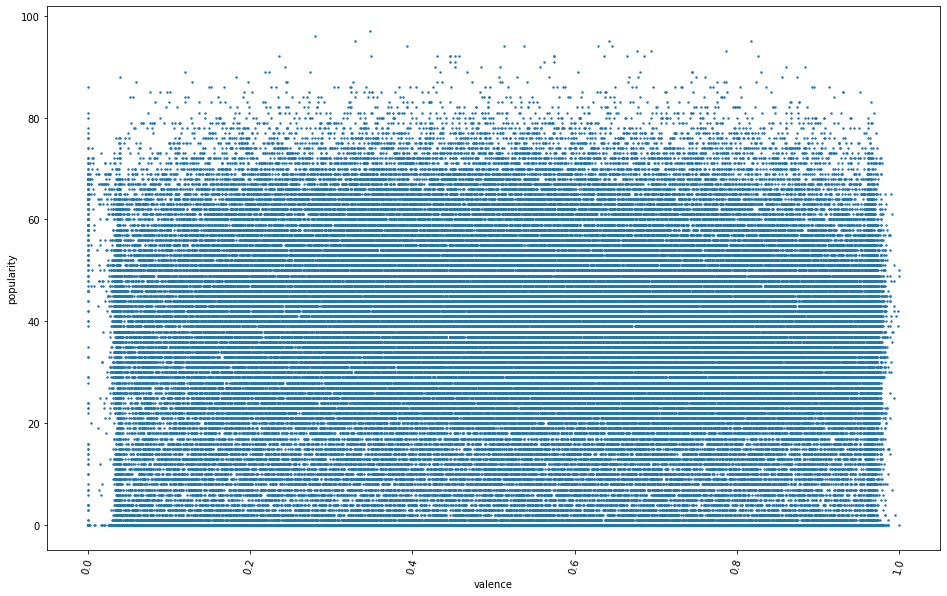

In [12]:
for var in continuous_variables:
    data.plot.scatter(x=var, y='popularity', s=2)
    plt.xticks(rotation=75,
          fontweight='light',
          fontsize='medium')
    fig = plt.gcf()
    fig.set_size_inches(16,10)
    plt.show()

## Statistical Tests

### Chi-square test of goodness
 - We are using the chi-squared test to use popularity as our nominal value that is represented as 0 or 1. Then we use our other categorical varibles to see wether the number of obersvations in each category fits a theoretical expectation. 
 
### Kruskal-Wallis Test
 - We are goingto use the kruskal wallis test because within our data the nominal value is popularity with a value of 0 or 1 and then we have measurement variables which are the variables that give us details of the songs ie. acousticness.

## BEFORE

In [13]:
for i in numerical:
    combination_counts = data[['popularity', i]]\
                    .groupby(by=['popularity', i])\
                    .size().unstack(level=0).fillna(0)
    chi2, price_pValue, _, _ = stats.chi2_contingency(combination_counts)
    print(i, price_pValue)

acousticness 0.0
danceability 5.3778874632797e-118
duration_ms 0.0
energy 1.088882467481368e-196
instrumentalness 1.0
liveness 0.9865248526592585
loudness 1.0
release_date 0.0
speechiness 6.8456179854490696e-192
tempo 1.0
valence 1.0


In [14]:
#samples_by_acc = []
#for j in numerical:
#    for value in set(data[j]):
#        mask = data[j] == value
#        samples_by_acc.append(data['popularity'][mask])
#    value3, beds_p = stats.kruskal(*samples_by_acc)
#    print(j, beds_p)

In [15]:
#samples_by_acc = []
#for j in categorical:
#    for value in set(data[j]):
#        mask = data[j] == value
#        samples_by_acc.append(data['popularity'][mask])
#    value3, beds_p = stats.kruskal(*samples_by_acc)
#    print(j, beds_p)

## Linear Regression / Classification 

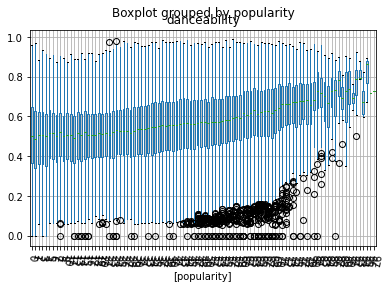

In [16]:
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
data[['popularity', numerical[1]]].boxplot(by="popularity")
plt.xticks(x=data['popularity'], rotation=-100)
plt.show()

<AxesSubplot:xlabel='year', ylabel='popularity'>

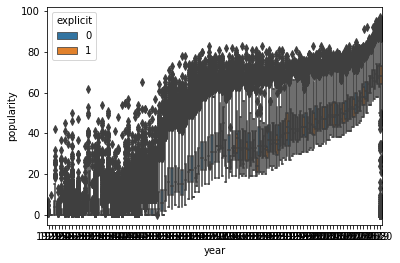

In [17]:
sns.boxplot(x='year', y='popularity', hue='explicit', data=data)